## 1. solve the time threshold to activate the toxin pathway

C:\Users\asus\AppData\Local\Temp\ipykernel_25332\650196219.py:36: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


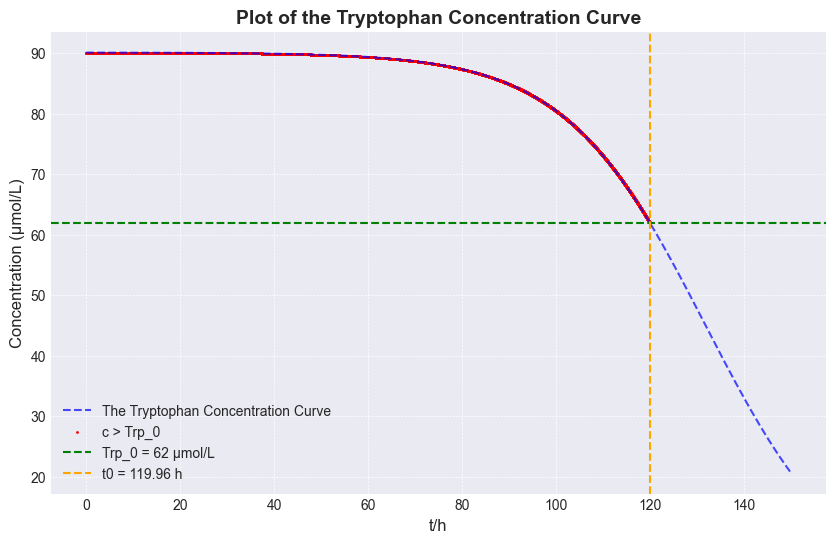

In [7]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.optimize import fsolve  
import math  

# Constants  
t_1 = 1.2456  # average lifespan of normal active bacteria (day)  
C12 = 0.0130  
C1 = 500  
Trp_0 = 62  # Tryptophan concentration threshold  

# The curve for the Tryptophan concentration  
def curve_Trp(x):  
    return (5911 * math.e ** (-x / 15) / (0.01 + 65.61 * math.e ** (-x / 15)))  

# Generate x values  
x_values = np.linspace(0, 150, 10000)  

# Calculate y values  
y_values = curve_Trp(x_values)  

# Function to find t0 using fsolve  
def find_t0():  
    # Define the function for which we want to find the root  
    def func(x):  
        return curve_Trp(x) - Trp_0  

    # Use fsolve to find the root  
    t0, = fsolve(func, 0)  # Start looking for a root near x = 0  
    return t0  

# Find the critical time t0  
t0 = find_t0()  

# Apply plot styling  
plt.style.use('seaborn-darkgrid')  
plt.figure(figsize=(10, 6))  

# Plot the Tryptophan concentration curve  
plt.plot(x_values, y_values, label='The Tryptophan Concentration Curve', linestyle='--', alpha=0.7, color='blue')  

# Mark points where concentration is greater than Trp_0  
above_threshold = y_values > Trp_0  
plt.scatter(x_values[above_threshold], y_values[above_threshold], color='red', s=1, label='c > Trp_0')  

# Add a horizontal line for the critical concentration  
plt.axhline(y=Trp_0, color='green', linestyle='--', label=f'Trp_0 = {Trp_0} μmol/L')  

# Mark the critical time t0  
plt.axvline(x=t0, color='orange', linestyle='--', label=f't0 = {t0:.2f} h')  

# Add titles and labels  
plt.title('Plot of the Tryptophan Concentration Curve', fontsize=14, weight='bold')  
plt.xlabel('t/h', fontsize=12)  
plt.ylabel('Concentration (μmol/L)', fontsize=12)  
plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend()  
plt.show()






## 2. After the time threshold, the curve for bacterial population density curve 

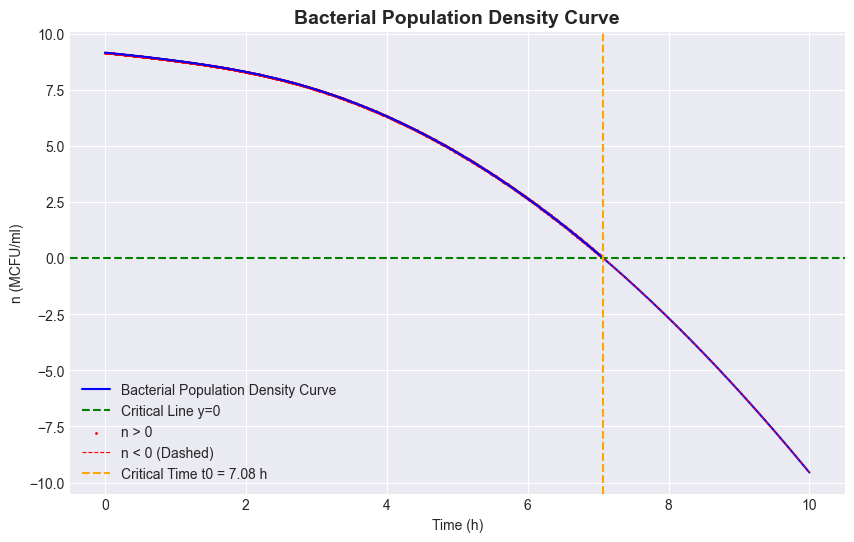

In [70]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import solve_ivp  
from scipy.optimize import fsolve  

# Constants  
c0 = 0.3  
c1 = 0.02  
k1 = 18  
k2 = 0.3  
k3 = 72  
k4 = 2  
k5 = 188  
k6 = 1.5  
k7 = 3.8  
k8 = 310  
k9 = 3270  
k10 = 20  
k11 = 0.26  
Kd = 0.01  
t0 = 30  
t1 = 0.3  
n0 = 100  

# the differential equations  
def solve_all(t, z):  
    x1, x2, x3, x4, x5, x6, x7 = z  
    a = Kd / (x2**2 + Kd)  
    b = 2 * Kd * x1 * x2 / (x2**2 + Kd)**2  
    c = x2**2 / (x2**2 + Kd)  
    dx1dt = ((k2 * c1 - k2 * x1) * (1 + b) - b * x2 * (k1 * x7 / n0 - 1 / t1)) / ((1 + b) * a - b * c)  
    dx2dt = (k1 * x7 * x2 / n0 - x2 / t1 - c * dx1dt) / (1 + b)  
    dx3dt = k3 * x2**2 * x1 / (Kd + x2**2) - k4 * x3  
    dx4dt = k5 * x3 - k6 * x4  
    dx5dt = -k7 * x4 + k8 - k9 * x5  
    dx6dt = k10 * x5  
    dx7dt = -x7 / t0 - k11 * x6  
    return [dx1dt, dx2dt, dx3dt, dx4dt, dx5dt, dx6dt, dx7dt]  

# initial condition  
x1 = 0.02  
x2 = 0.1486  
x3 = 0.4946  
x4 = 62  
x5 = 0  
x6 = 0  
x7 = 9.17  

z0 = [x1, x2, x3, x4, x5, x6, x7]  

# time range from 0 to 10h 
t_span = (0, 10)  # from 0 to 10h
t_eval = np.linspace(*t_span, 1000)  # generating 1000 time values to solve it 

# utilize solve_ivp solve the first differential systems  
sol = solve_ivp(solve_all, t_span, z0, t_eval=t_eval, method='RK45')  

# Define the critical value function   
def critical_function(t):  
    solution = solve_ivp(solve_all, [0, t], z0, t_eval=t)  
    return solution.y[6, -1]  # Focus on x7 (the number density) 

# Using fsolve to find t0 where n=0 
t0_solution = fsolve(critical_function, 1.0)  
t0 = t0_solution[0]  

# Plot results
plt.figure(figsize=(10, 6))  

# Plot the original curve  
plt.plot(sol.t, sol.y[6], label='Bacterial Population Density Curve', color='blue')  

# Mark points above 0  
above_zero = sol.y[6] > 0  
below_zero = sol.y[6] < 0  

plt.scatter(sol.t[above_zero], sol.y[6, above_zero], color='purple', s=1, label='n > 0')  
plt.plot(sol.t[below_zero], sol.y[6, below_zero], 'b--', linewidth=0.8, label='n < 0 (Dashed)')  

# Mark the critical time t1  
plt.axvline(x=t0, color='orange', linestyle='--', label=f'Critical Time t1 = {t0:.2f} h')  

# Add legend and titles  
plt.title('Bacterial Population Density Curve', fontsize=14, weight='bold')  
plt.xlabel('Time (h)')  
plt.ylabel('n (MCFU/ml)')  
plt.legend()  
plt.grid(True)  
plt.show()

## 3. the distribution for the luminous bacteria

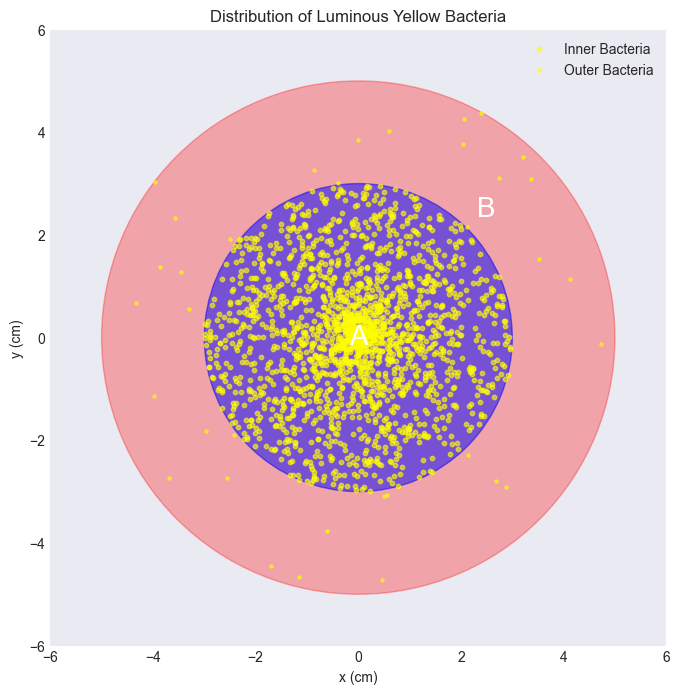

In [36]:
import numpy as np  
import matplotlib.pyplot as plt  

# Constants  
inner_radius = 3  # Radius of inner circle  
outer_radius = 5  # Radius of outer circle  
num_bacteria = 2000  # Total number of bacteria  
density_ratio = 100  # Density ratio between inner and outer circles  

# Calculate the area and number of bacteria in each region  
area_inner = np.pi * inner_radius**2  
area_outer = np.pi * (outer_radius**2 - inner_radius**2)  

num_inner_bacteria = int(num_bacteria * density_ratio * area_inner / (density_ratio * area_inner + area_outer))  
num_outer_bacteria = num_bacteria - num_inner_bacteria  

# Randomly generate bacteria positions in the inner circle  
angles_inner = np.random.uniform(0, 2 * np.pi, num_inner_bacteria)  
radii_inner = np.random.uniform(0, inner_radius, num_inner_bacteria)  
x_inner = radii_inner * np.cos(angles_inner)  
y_inner = radii_inner * np.sin(angles_inner)  

# Randomly generate bacteria positions in the outer ring  
angles_outer = np.random.uniform(0, 2 * np.pi, num_outer_bacteria)  
radii_outer = np.sqrt(np.random.uniform(inner_radius**2, outer_radius**2, num_outer_bacteria))  
x_outer = radii_outer * np.cos(angles_outer)  
y_outer = radii_outer * np.sin(angles_outer)  

# Setup the plot  
fig, ax = plt.subplots(figsize=(8, 8))  

# Draw inner and outer circles  
inner_circle = plt.Circle((0, 0), inner_radius, color='blue', alpha=0.5)  
outer_circle = plt.Circle((0, 0), outer_radius, color='red', alpha=0.3)  
ax.add_patch(outer_circle)  
ax.add_patch(inner_circle)  

# Plot bacteria distribution  
ax.scatter(x_inner, y_inner, color='yellow', s=10, alpha=0.6, label='Inner Bacteria')  
ax.scatter(x_outer, y_outer, color='yellow', s=5, alpha=0.6, label='Outer Bacteria')  

# Add area labels  
ax.text(0, 0, 'A', color='white', fontsize=20, ha='center', va='center')  
ax.text(outer_radius/2, outer_radius/2, 'B', color='white', fontsize=20, ha='center', va='center')  

# Set plot attributes  
ax.set_xlim(-outer_radius-1, outer_radius+1)  
ax.set_ylim(-outer_radius-1, outer_radius+1)  
ax.set_aspect('equal', 'box')  
ax.set_title('Distribution of Luminous Yellow Bacteria')  
ax.set_xlabel('x (cm)')  
ax.set_ylabel('y (cm)')  
plt.legend()  
plt.grid(False)  
plt.show()

## 4. the change curves of the number density of small clusters of bacteria entering region B at different times

After 39.76476476476476h, the bacteria cluster which starts from 0h will die
After 38.36336336336336h, the bacteria cluster which starts from 4h will die
After 37.06206206206207h, the bacteria cluster which starts from 8h will die
After 35.76076076076076h, the bacteria cluster which starts from 12h will die
After 34.55955955955956h, the bacteria cluster which starts from 16h will die
After 33.408408408408405h, the bacteria cluster which starts from 20h will die


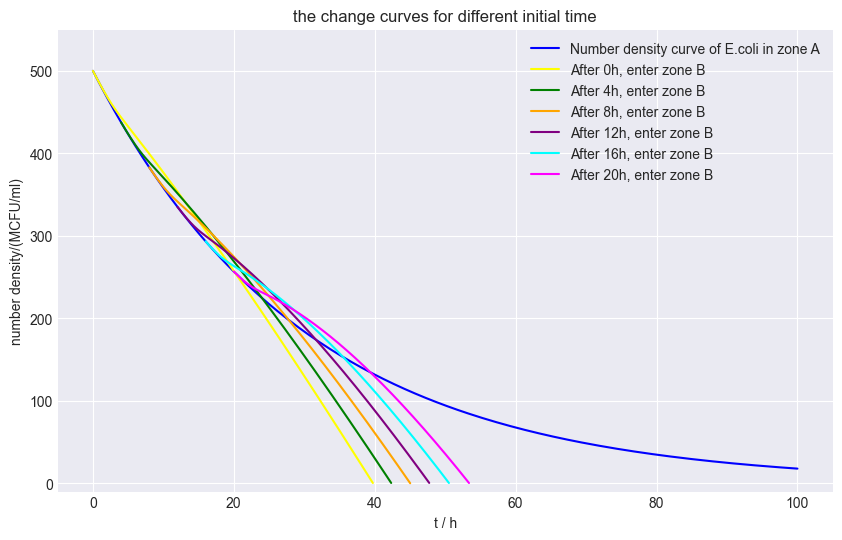

In [71]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import solve_ivp  
from scipy.optimize import fsolve  
import math  

# Constants  
c0 = 0.3  
c1 = 0.02  
k1 = 18  
k2 = 0.3  
k3 = 72  
k4 = 2  
k5 = 188  
k6 = 1.5  
k7 = 3.8  
k8 = 310  
k9 = 3270  
k10 = 20  
k11 = 0.26  
Kd = 0.01  
t0 = 30  
t1 = 0.3  
n0 = 100 
Trp0 = 62 

def n_t(t):  
    return 500 * np.exp(-t / 30)  

t_s = [0, 4, 8, 12, 16, 20]  

def plot_data(x):  
    # Initial conditions and derived constants  
    n_b0 = n_t(x)  
    x1 = 0.02  
    x2 = k1 * t1 * n_b0 / n0 * c0  
    x3 = c1 * x2**2 * k3 / ((Kd + x2**2) * k4)  
    x4 = k5 * x3 / k6  
    x5 = 0  
    x6 = 0  
    x7 = n_b0  

    z0 = [x1, x2, x3, x4, x5, x6, x7]  

    # Differential equations  
    def solve_all(t, z):  
        x1, x2, x3, x4, x5, x6, x7 = z  
        a = Kd / (x2**2 + Kd)  
        b = 2 * Kd * x1 * x2 / (x2**2 + Kd)**2  
        c = x2**2 / (x2**2 + Kd)  
        dx1dt = ((k2 * c1 - k2 * x1) * (1 + b) - b * x2 * (k1 * (0.01 * n_b0 * np.exp(-t / 30)) / n0 - 1 / t1)) / ((1 + b) * a - b * c)  
        dx2dt = (k1 * (0.01 * n_b0 * np.exp(-t / 30)) * x2 / n0 - x2 / t1 - c * dx1dt) / (1 + b)  
        dx3dt = k3 * x2**2 * x1 / (Kd + x2**2) - k4 * x3  
        dx4dt = k5 * x3 - k6 * x4  
        dx5dt = (-k7 * x4 + k8*np.heaviside(Trp0-x4, 0) - k9 * x5)
        dx6dt = (k10 * x5)
        dx7dt = (-x7 / t0 - k11 * x6)  
        return [dx1dt, dx2dt, dx3dt, dx4dt, dx5dt, dx6dt, dx7dt]  

    t_span = (0, 50)  
    t_eval = np.linspace(*t_span, 1000)  
    sol = solve_ivp(solve_all, t_span, z0, t_eval=t_eval, method='RK45')  

    above_zero = sol.y[6] > 0 
    below_zero = sol.y[6] < 0 
    zero_point = (sol.t[above_zero][-1]+sol.t[below_zero][0])/2

    return sol.t[above_zero] + x, sol.y[6, above_zero] , zero_point

list1 = []  
point_list = []
for i in t_s:  
    times, values, point = plot_data(i)  
    list1.append((times, values)) 
    point_list.append(point)

# Create figure  
plt.figure(figsize=(10, 6))  

# Plot each curve  
x = np.linspace(0, 100, 200)  
plt.plot(x, n_t(x), label='Number density curve of E.coli in zone A', color='blue')  

colors = ['yellow', 'green', 'orange', 'purple', 'cyan', 'magenta']  
for idx, (times, values) in enumerate(list1):  
    plt.plot(times, values, label=f'After {t_s[idx]}h, enter zone B', color=colors[idx])  
    print(f'After {point_list[idx]}h, the bacteria cluster which starts from {t_s[idx]}h will die')

# Add legend  
plt.legend()  

# Add title and labels  
plt.title('the change curves for different initial time')  
plt.xlabel('t / h')  
plt.ylabel('number density/(MCFU/ml)')  

# Set y-axis limits  
plt.ylim(-10, 550)  

# Show grid  
plt.grid(True)  

# Show plot  
plt.show()

After 39.71471471471472h, the bacteria cluster which starts from 0h will die
After 38.413413413413416h, the bacteria cluster which starts from 4h will die
After 37.112112112112115h, the bacteria cluster which starts from 8h will die
After 35.86086086086087h, the bacteria cluster which starts from 12h will die
After 34.65965965965967h, the bacteria cluster which starts from 16h will die
After 33.50850850850851h, the bacteria cluster which starts from 20h will die


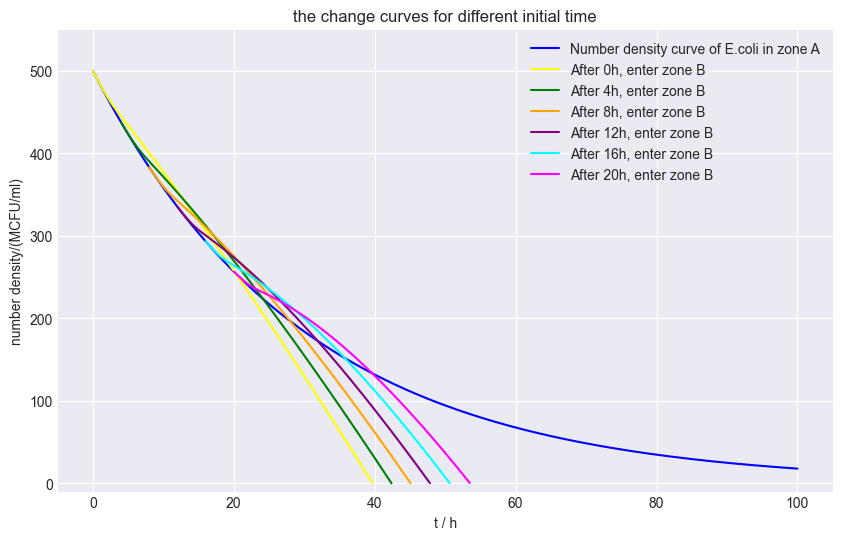

In [72]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import solve_ivp  
from scipy.optimize import fsolve  
import math  

# Constants  
c0 = 0.3  
c1 = 0.02  
k1 = 18  
k2 = 0.3  
k3 = 72  
k4 = 2  
k5 = 188  
k6 = 1.5  
k7 = 3.8  
k8 = 310  
k9 = 3270  
k10 = 20  
k11 = 0.26  
Kd = 0.01  
t0 = 30  
t1 = 0.3  
n0 = 100  

def n_t(t):  
    return 500 * np.exp(-t / 30)  

t_s = [0, 4, 8, 12, 16, 20]  

def plot_data(x):  
    # Initial conditions and derived constants  
    n_b0 = n_t(x)  
    x1 = 0.02  
    x2 = k1 * t1 * n_b0 / n0 * c0  
    x3 = c1 * x2**2 * k3 / ((Kd + x2**2) * k4)  
    x4 = k5 * x3 / k6  
    x5 = 0  
    x6 = 0  
    x7 = n_b0  

    z0 = [x1, x2, x3, x4, x5, x6, x7]  

    # Differential equations  
    def solve_all(t, z):  
        x1, x2, x3, x4, x5, x6, x7 = z  
        a = Kd / (x2**2 + Kd)  
        b = 2 * Kd * x1 * x2 / (x2**2 + Kd)**2  
        c = x2**2 / (x2**2 + Kd)  
        dx1dt = ((k2 * c1 - k2 * x1) * (1 + b) - b * x2 * (k1 * 0 / n0 - 1 / t1)) / ((1 + b) * a - b * c)  
        dx2dt = (k1 * 0 * x2 / n0 - x2 / t1 - c * dx1dt) / (1 + b)  
        dx3dt = k3 * x2**2 * x1 / (Kd + x2**2) - k4 * x3  
        dx4dt = k5 * x3 - k6 * x4  
        dx5dt = (-k7 * x4 + k8*np.heaviside(Trp0-x4, 0) - k9 * x5)
        dx6dt = (k10 * x5)  
        dx7dt = (-x7 / t0 - k11 * x6)   
        return [dx1dt, dx2dt, dx3dt, dx4dt, dx5dt, dx6dt, dx7dt]  

    t_span = (0, 50)  
    t_eval = np.linspace(*t_span, 1000)  
    sol = solve_ivp(solve_all, t_span, z0, t_eval=t_eval, method='RK45')  

    above_zero = sol.y[6] > 0 
    below_zero = sol.y[6] < 0 
    zero_point = (sol.t[above_zero][-1]+sol.t[below_zero][0])/2

    return sol.t[above_zero] + x, sol.y[6, above_zero] , zero_point

list1 = []  
point_list = []
for i in t_s:  
    times, values, point = plot_data(i)  
    list1.append((times, values)) 
    point_list.append(point)

# Create figure  
plt.figure(figsize=(10, 6))  

# Plot each curve  
x = np.linspace(0, 100, 200)  
plt.plot(x, n_t(x), label='Number density curve of E.coli in zone A', color='blue')  

colors = ['yellow', 'green', 'orange', 'purple', 'cyan', 'magenta']  
for idx, (times, values) in enumerate(list1):  
    plt.plot(times, values, label=f'After {t_s[idx]}h, enter zone B', color=colors[idx])  
    print(f'After {point_list[idx]}h, the bacteria cluster which starts from {t_s[idx]}h will die')

# Add legend  
plt.legend()  

# Add title and labels  
plt.title('the change curves for different initial time')  
plt.xlabel('t / h')  
plt.ylabel('number density/(MCFU/ml)')  

# Set y-axis limits  
plt.ylim(-10, 550)  

# Show grid  
plt.grid(True)  

# Show plot  
plt.show()